<a href="https://colab.research.google.com/github/wjohnson7/WJcosc470s24/blob/main/solutions/WJcifar10_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
!git clone https://github.com/kartoone/DeepLearningPython nn

--2024-04-13 21:23:43--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  75.9MB/s    in 2.1s    

2024-04-13 21:23:45 (75.9 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

Cloning into 'nn'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 80 (delta 11), reused 5 (delta 1), pack-reused 55
Receiving objects: 100% (80/80), 16.44 MiB | 31.30 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [4]:
!tar -xzvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [5]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def vectorize(label):
    result = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
    result[label] = 1.
    return np.reshape(result, (10,1))

{b'batch_label': b'testing batch 1 of 1', b'labels': [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0

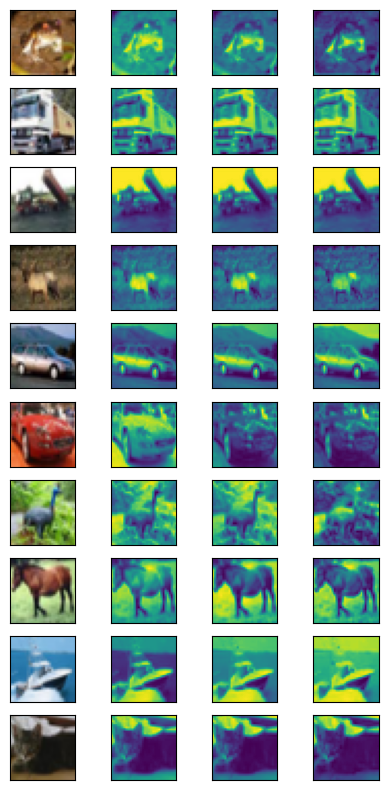

In [6]:
import numpy as np
training = {'labels':[],'data':[]}
for i in range(1,6):
  filename = f"cifar-10-batches-py/data_batch_{i}"
  dict = unpickle(filename)
#  print(dict)
  training['labels'].extend(dict[b'labels'])
  training['data'].extend(dict[b'data'])

raw_test_data = unpickle("cifar-10-batches-py/test_batch")
print(raw_test_data)
red_test_data = [[np.reshape(d[:1024]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
green_test_data = [[np.reshape(d[1024:2048]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
blue_test_data = [[np.reshape(d[2048:]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
print(red_test_data[0][0])
print(red_test_data[0][1])
#print(len(training['labels']))
#print(len(training['data']))
#print(training['labels'][0])
#print(training['data'][0][:1024])
import numpy as np
np.set_printoptions(linewidth=1000000)
print(np.reshape(training['data'][0][:1024], (32,32)))
red_training_data = [[np.reshape(d[:1024]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
green_training_data = [[np.reshape(d[1024:2048]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
blue_training_data = [[np.reshape(d[2048:]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
print(red_training_data[0][0])
print(red_training_data[0][1])
training['data'] = np.array(training['data'])
training['data'] = training['data'].reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 4, figsize=(5,10))
for i in range(10):
  axes[i,0].imshow(training['data'][i])
  axes[i,1].imshow(np.reshape(red_training_data[i][0],(32,32)))
  axes[i,2].imshow(np.reshape(green_training_data[i][0],(32,32)))
  axes[i,3].imshow(np.reshape(blue_training_data[i][0],(32,32)))
  for c in range(4):
    axes[i,c].set_xticks([])
    axes[i,c].set_yticks([])

In [11]:
import numpy as np

def vote(a1, a2, a3):
  a1vote = np.argmax(a1)
  a1max = np.max(a1)
  a2vote = np.argmax(a2)
  a2max = np.max(a2)
  a3vote = np.argmax(a3)
  a3max = np.max(a3)
  if a1vote == a2vote or a1vote == a3vote:
    return a1vote
  elif a2vote == a1vote or a2vote == a3vote:
    return a2vote
  elif a3vote == a1vote or a3vote == a2vote:
    return a3vote
  else: # np.argmax is giving us the index
    return [a1vote, a2vote, a3vote][np.argmax([a1max, a2max, a3max])]

In [9]:
import numpy as np
import nn.network as network
net_RED = network.Network([1024, 30, 10])
net_GREEN = network.Network([1024, 30, 10])
net_BLUE = network.Network([1024, 30, 10])

# modify the rawtraining data labels so that they are vectorized
# create three sets of training data ... one set is the RED training data, etc...
net_RED.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)
net_GREEN.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)
net_BLUE.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)

r = net_RED.feedforward(red_test_data[0][0])
g = net_GREEN.feedforward(red_test_data[0][0])
b = net_BLUE.feedforward(red_test_data[0][0])

print(r)
print(g)
print(b)

Epoch 0 : 1717 / 10000
Epoch 1 : 2071 / 10000
Epoch 2 : 1989 / 10000
Epoch 3 : 1964 / 10000
Epoch 4 : 1537 / 10000
Epoch 5 : 2021 / 10000
Epoch 6 : 2205 / 10000
Epoch 7 : 2374 / 10000
Epoch 8 : 2347 / 10000
Epoch 9 : 2384 / 10000
Epoch 10 : 2252 / 10000
Epoch 11 : 2225 / 10000
Epoch 12 : 2438 / 10000
Epoch 13 : 2135 / 10000
Epoch 14 : 2339 / 10000
Epoch 15 : 2463 / 10000
Epoch 16 : 2391 / 10000
Epoch 17 : 2702 / 10000
Epoch 18 : 2557 / 10000
Epoch 19 : 2635 / 10000
Epoch 20 : 2487 / 10000
Epoch 21 : 2528 / 10000
Epoch 22 : 2676 / 10000
Epoch 23 : 2700 / 10000
Epoch 24 : 2789 / 10000
Epoch 25 : 2523 / 10000
Epoch 26 : 2556 / 10000
Epoch 27 : 2644 / 10000
Epoch 28 : 2464 / 10000
Epoch 29 : 2590 / 10000
Epoch 0 : 1853 / 10000
Epoch 1 : 2022 / 10000
Epoch 2 : 1510 / 10000
Epoch 3 : 1853 / 10000
Epoch 4 : 1655 / 10000
Epoch 5 : 1529 / 10000
Epoch 6 : 2115 / 10000
Epoch 7 : 1764 / 10000
Epoch 8 : 1729 / 10000
Epoch 9 : 2218 / 10000
Epoch 10 : 1985 / 10000
Epoch 11 : 2210 / 10000
Epoch 12 : 2

In [12]:
correct_images = []

for i in range(len(red_test_data)):
  a1 = net_RED.feedforward(red_test_data[i][0])
  a2 = net_GREEN.feedforward(green_test_data[i][0])
  a3 = net_BLUE.feedforward(blue_test_data[i][0])
  ans = vote(a1, a2, a3)
  if ans == red_test_data[i][1]:
    correct_images.append(i)

# overall accuracy is length of the correct_images list / length of red_test_data
print(f"overall accuracy: {len(correct_images) / len(red_test_data)}")

overall accuracy: 0.2967


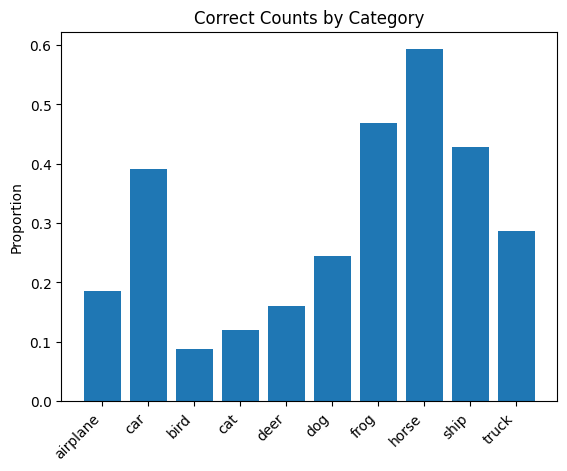

In [14]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
correct_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# assuming correct_images and red_test_data are defined elsewhere
for i in correct_images:
  correct_counts[red_test_data[i][1]] += 1

# convert counts to a % (assuming your divisor is correct, adjust as needed)
correct_counts = np.array(correct_counts) / 1000

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(labels, correct_counts)

# Add labels and a title
ax.set_ylabel('Proportion')
ax.set_title('Correct Counts by Category')
ax.set_xticks(range(len(labels))) # Set x-ticks position
ax.set_xticklabels(labels, rotation = 45, ha = "right") # Set x-ticks labels with rotation for better visibility

plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)
print("Keras version: ", keras.__version__)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings

Tensorflow version:  2.15.0
Keras version:  2.15.0


In [17]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [18]:
# Normalizing
X_train = X_train / 255
X_test = X_test / 255
# One-hot encoding
Y_train_en = to_categorical(Y_train, 10)
Y_test_en = to_categorical(Y_test, 10)

In [20]:
model = Sequential()
model.add(Conv2D(32, (4, 4), input_shape = (32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model.summary()
history = model.fit(X_train, Y_train_en, epochs = 20, verbose=1, validation_data = (X_test, Y_test_en))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [22]:
correct_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

results = list(model.predict(X_test))
results = [np.argmax(result) for result in results]
print(results)

labels = [label[0] for label in list(Y_test)]
for i, label in enumerate(labels):
  if results[i] == label:
    correct_counts[label] += 1

correct_counts = np.array(correct_counts) / 1000
print(correct_counts)

313/313 [==============================] - 3s 10ms/step
[3, 8, 8, 0, 4, 6, 5, 6, 3, 1, 8, 9, 4, 7, 9, 2, 5, 5, 8, 6, 7, 2, 4, 9, 4, 4, 4, 4, 9, 6, 3, 5, 4, 5, 9, 3, 4, 1, 9, 5, 4, 6, 5, 6, 8, 9, 2, 5, 7, 6, 9, 8, 6, 5, 8, 8, 4, 5, 5, 5, 7, 5, 1, 3, 5, 6, 8, 8, 5, 7, 4, 5, 8, 8, 9, 2, 2, 3, 3, 8, 8, 1, 1, 7, 5, 7, 4, 8, 8, 9, 0, 4, 8, 6, 4, 6, 6, 8, 0, 7, 4, 7, 6, 3, 1, 1, 3, 6, 3, 7, 4, 8, 6, 2, 9, 3, 0, 4, 7, 7, 8, 5, 1, 2, 8, 1, 9, 2, 3, 2, 4, 1, 8, 9, 1, 2, 9, 7, 4, 0, 6, 5, 6, 5, 8, 7, 6, 2, 7, 2, 0, 9, 6, 9, 0, 5, 2, 9, 3, 4, 2, 1, 1, 6, 8, 2, 8, 4, 5, 0, 9, 9, 9, 2, 9, 9, 3, 7, 2, 1, 0, 5, 2, 2, 3, 8, 6, 2, 3, 2, 2, 8, 2, 1, 5, 6, 3, 4, 7, 8, 3, 9, 8, 5, 1, 3, 0, 5, 7, 9, 5, 1, 5, 9, 8, 5, 7, 9, 8, 4, 7, 5, 9, 7, 3, 9, 3, 2, 3, 6, 5, 1, 3, 1, 8, 0, 4, 9, 5, 5, 1, 1, 1, 9, 0, 1, 1, 8, 2, 0, 5, 3, 9, 9, 2, 8, 6, 0, 1, 1, 6, 1, 5, 3, 8, 8, 1, 4, 7, 8, 3, 5, 6, 3, 8, 5, 0, 9, 4, 7, 9, 1, 6, 1, 9, 9, 1, 8, 7, 9, 1, 2, 6, 1, 3, 4, 6, 0, 0, 6, 6, 6, 5, 9, 6, 8, 9, 2, 9, 4, 0, 6, 0, 2, 4

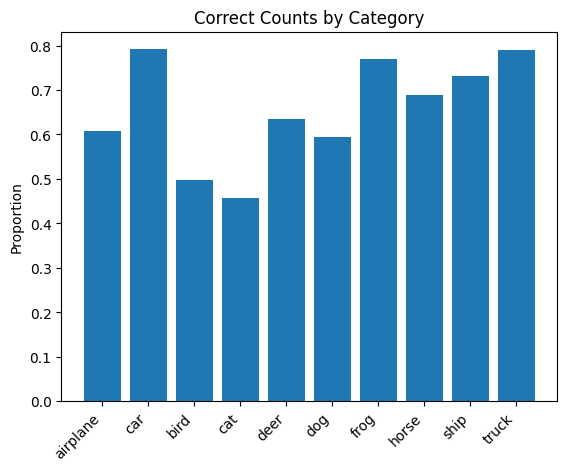

In [23]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(labels, correct_counts)

# Add labels and a title
ax.set_ylabel('Proportion')
ax.set_title('Correct Counts by Category')
ax.set_xticks(range(len(labels))) # Set x-ticks position
ax.set_xticklabels(labels, rotation = 45, ha = "right") # Set x-ticks labels with rotation for better visibility

plt.show()